In [3]:
import sys
sys.path.append("../")

In [4]:
from scipy import special
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from delay.delay import *
import delay.model as model

import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue

In [90]:
simulation = Simulation(FunctionType.HARD_INTERVAL, (1, 0), calculateValue, calc.linear(N=4, w=0.9))
simulation.setN(4)
simulation.setConv(100)
simulation.setDuration(10000000) # 10^7
simulation.setD(1)
simulation.run()

µ =  -0.133253827176411


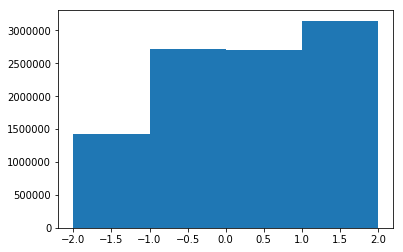

In [92]:
simulation.plotOnlyHistogram()

[0.1427343714531257, 0.2713076457384708, 0.27096494580701086, 0.20643145871370824, 0.10856157828768434]


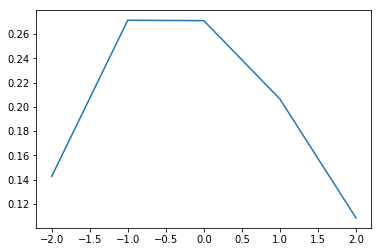

In [91]:
N=4
h = np.histogram(simulation.x, bins=np.linspace(-N/2-0.5, N/2+0.5, N+2), density=True)[0].tolist()
print(h)
model.plot(h);

In [7]:
p = [0.2, 0.5, 0.7]
model.eigenvector(p)

[0.625, 1.4]

In [89]:
from importlib import reload
reload(model);

[0.08333333333333334, 0.20833333333333334, 0.4166666666666667, 0.20833333333333334, 0.08333333333333334]


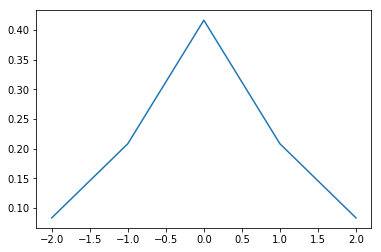

In [104]:
x = model.initialStationaryProbabilities(4, 0.1, 1)
print(x)
model.plot(x);

In [20]:
print(model.initialRightProbabilities(4, 1, 0.1))

AttributeError: module 'delay.model' has no attribute 'initialRightProbabilities'

In [6]:
d = 1
tauA = 1
N = 4
epsilon = 0.1

def rightProbabilities2(stationaryProbs, rightProbs):
    rp = []
    i = -N/2
    while i <= N/2:
        if i < -d:
            rp.append(1-epsilon)
        elif i <= d-tauA:
            rp.append(1/2)
        else: # i > d-tauA
            i0 = model.index(i-1, N)
            i1 = model.index(i, N)
            i2 = model.index(i+1, N)
            p1 = stationaryProbs[i0]
            p2 = stationaryProbs[i2] if i < N/2 else stationaryProbs[i1]
            r1 = rightProbs[i0]
            r2 = rightProbs[i2] if i < N/2 else rightProbs[i1]
            # TODO: what if we are far right and don't touch the random walk fragment
            a = p1*r1*1/2 + p2*(1-r2)*epsilon # not normalized
            a /= p1*r1 + p2*(1-r2)      # normalized
            rp.append(a)
        i += 1
        
    return rp

r = model.initialRightProbabilities(N, d, epsilon)
r = rightProbabilities2(x, r)
print(r)
model.plot(r)

NameError: name 'initialRightProbabilities' is not defined

In [7]:
stationary = model.probabilities2Stationary(r)
model.plot(stationary)
print(stationary)

NameError: name 'r' is not defined

In [8]:
r = rightProbabilities2(stationary, r)
print(r)
model.plot(r)

NameError: name 'stationary' is not defined

In [11]:
r = model.initialRightProbabilities(N, d, epsilon)
for _ in range(40):
    stationary = model.probabilities2Stationary(r)
    for __ in range(50):
        r = rightProbabilities2(stationary, r)

In [12]:
r = rightProbabilities2(stationary, r)
print(r)

[0.9, 0.5, 0.5, 0.35714285814221747, 0.30000000112620856]


[0.9, 0.5, 0.5, 0.35714285814221747, 0.30000000112620856]


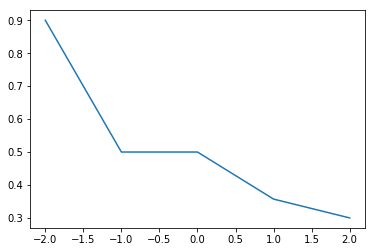

In [13]:
print(r)
model.plot(r);

[0.1489361700700316, 0.26808510612605685, 0.26808510612605685, 0.20851063842218664, 0.10638297925566803]


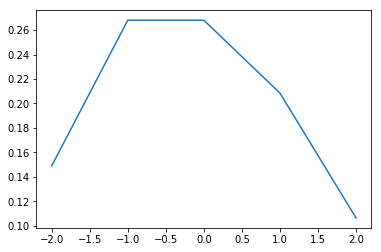

In [14]:
stationary = model.probabilities2Stationary(r)
print(stationary)
model.plot(stationary)

In [19]:
y = np.linspace(-N/2, N/2, num=N+1)
np.dot(stationary, y)

-0.1446808493325974